In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [3]:
file_path = r"C:\Users\LENOVO THINKPAD 13\Downloads\Decision Tree (1)\heart_disease.xlsx"

# Load the 'Heart_disease' sheet
df = pd.read_excel(file_path, sheet_name='Heart_disease')

# Preview the first 5 rows
print(df.head())

# Check data types and shape
print(df.info())
df.shape

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

(908, 13)

In [4]:
# Strip spaces, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


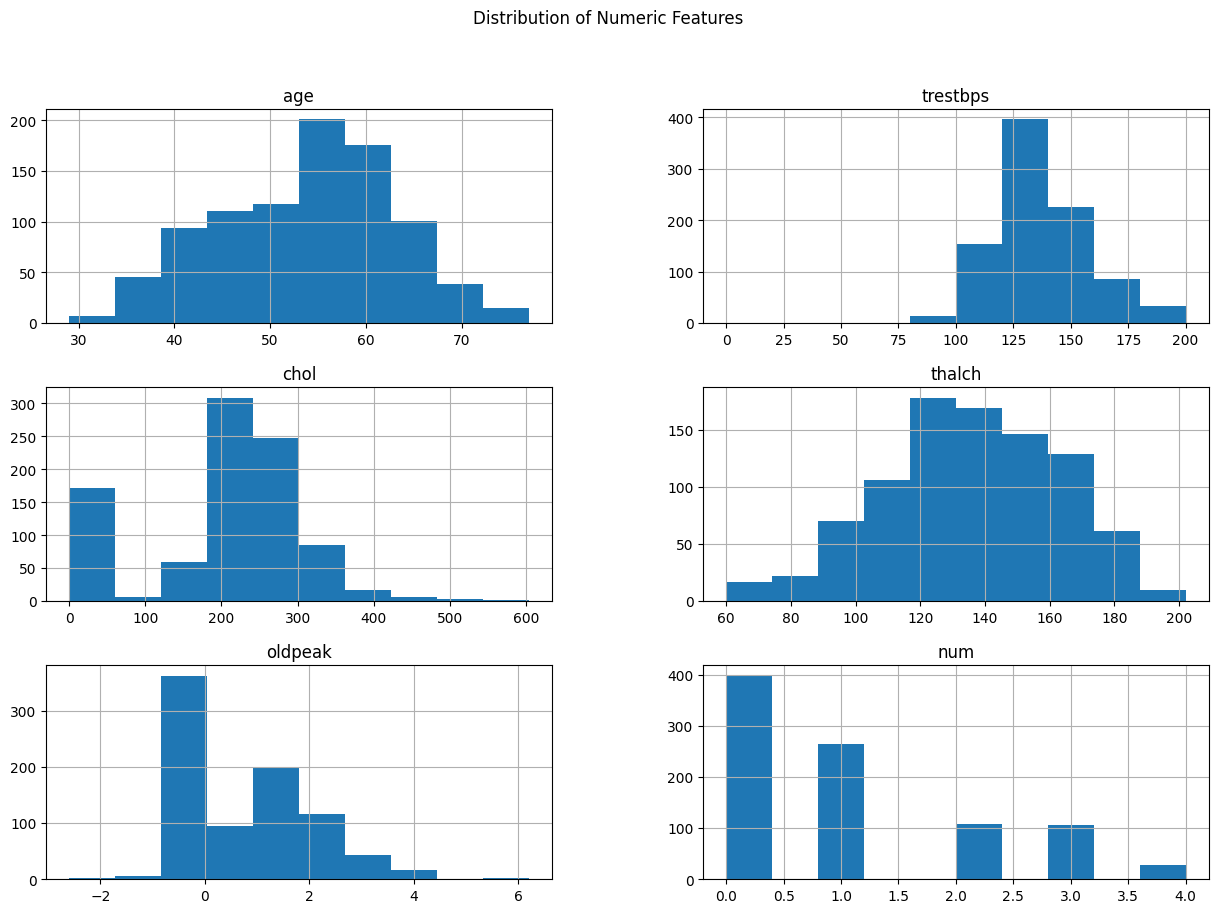

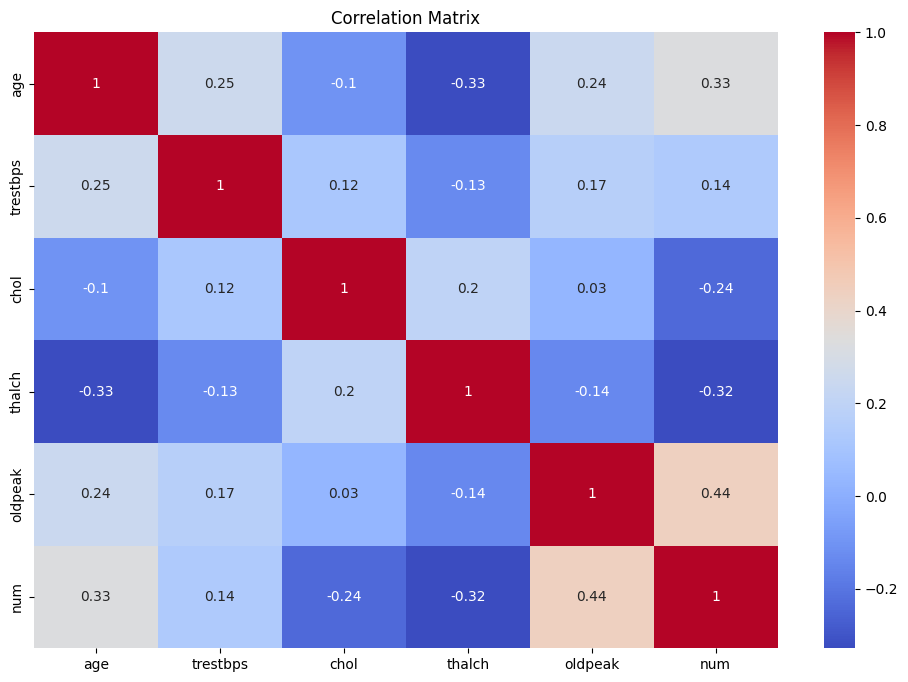

In [5]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics for numeric columns
print(df.describe())

# Visualize distributions of numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(15,10))
plt.suptitle("Distribution of Numeric Features")
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang', 'fbs']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [7]:
# Target column
target = 'num'

X = df.drop(columns=[target])
y = df[target]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Create and train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.510989010989011
Precision: 0.5139485753815697
Recall: 0.510989010989011
F1-score: 0.5112235253096824

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72        89
           1       0.39      0.46      0.42        48
           2       0.19      0.18      0.19        22
           3       0.29      0.24      0.26        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.51      0.51      0.51       182



In [10]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_dt = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Evaluate tuned model
y_pred_best = best_dt.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_pred_best, zero_division=0))


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Model Accuracy: 0.5714285714285714

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        89
           1       0.37      0.52      0.43        48
           2       0.36      0.23      0.28        22
           3       0.20      0.06      0.09        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.34      0.33      0.32       182
weighted avg       0.53      0.57      0.54       182



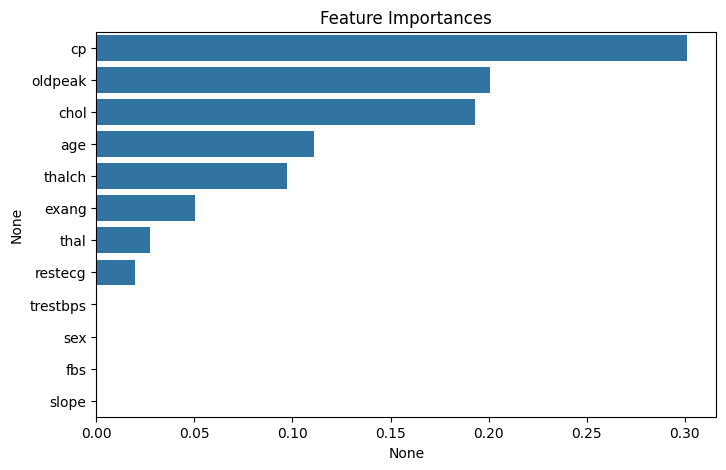

In [11]:
importances = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances")
plt.show()


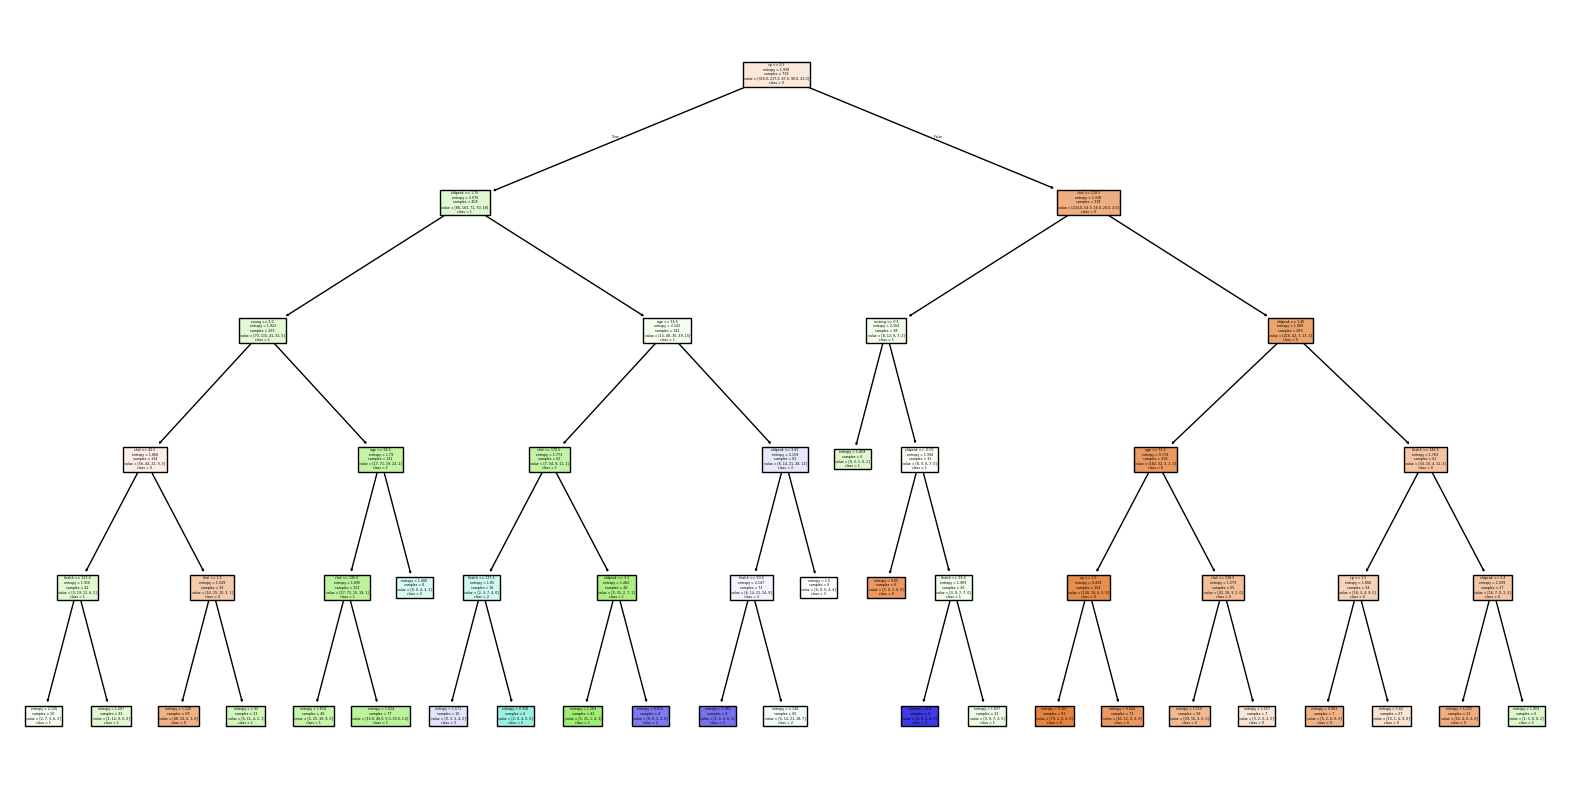

In [12]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=[str(cls) for cls in best_dt.classes_], filled=True)
plt.show()


Absolutely! Here are detailed answers to the interview questions related to **Decision Trees** and preprocessing, tailored to your heart disease dataset project:

---

### **Q1. What are some common hyperparameters of Decision Tree models, and how do they affect the model's performance?**

**Common Hyperparameters:**

1. **criterion**

   * Options: `'gini'` or `'entropy'`
   * Determines how the tree measures the quality of a split:

     * `gini` = Gini impurity
     * `entropy` = Information gain
   * Affects which features are chosen for splits.

2. **max_depth**

   * Maximum depth of the tree.
   * Controls overfitting:

     * Low depth → simpler tree → may underfit
     * High depth → complex tree → may overfit

3. **min_samples_split**

   * Minimum number of samples required to split a node.
   * Higher values prevent splitting small nodes → reduces overfitting.

4. **min_samples_leaf**

   * Minimum number of samples required at a leaf node.
   * Ensures leaves aren’t too small → more generalization.

5. **max_features**

   * Number of features considered at each split.
   * Lower values → faster training, more randomness, potentially better generalization.

**Effect on Performance:**

* Tuning these hyperparameters balances **bias vs variance**:

  * Small tree (low `max_depth`) → high bias, low variance → underfit
  * Large tree (high `max_depth`) → low bias, high variance → overfit

---

### **Q2. What is the difference between Label Encoding and One-Hot Encoding?**

**1️⃣ Label Encoding**

* Converts each category into an integer:

  ```
  Male → 0, Female → 1
  ```
* **Pros:** Simple, uses only one column.
* **Cons:** Imposes an ordinal relationship (0 < 1) even if none exists.
* **Best for:** Ordinal features (e.g., Low/Medium/High).

**2️⃣ One-Hot Encoding**

* Creates a new binary column for each category:

  ```
  sex_male  sex_female
      1          0
      0          1
  ```
* **Pros:** No ordinal assumptions, preserves independence.
* **Cons:** Can create many columns if there are many categories.
* **Best for:** Nominal features (e.g., Gender, Chest pain type, Thalassemia type).

**In your heart disease dataset:**

* We used **Label Encoding** for categorical features like `sex`, `cp`, `restecg`, `slope`, `thal`, `exang`, `fbs` because the categories are limited and the tree can handle integer labels.
* Decision Trees are **not sensitive to integer encoding**, so one-hot encoding is optional here.
